# ML s02 - Bitcoin

- Diffrent features
- Linear Regression model without regularize vs with L1 penalty (Lasso) vs with L2 penalty (Ridge)

[*********************100%%**********************]  1 of 1 completed
/home/sib/Coding_Dell_THR24/.machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.749e+08, tolerance: 7.698e+07
  model = cd_fast.enet_coordinate_descent(
/home/sib/Coding_Dell_THR24/.machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.441e+08, tolerance: 7.698e+07
  model = cd_fast.enet_coordinate_descent(
/home/sib/Coding_Dell_THR24/.machinelearning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not conv

                            features               model     all_rmse  \
0   ['Open', 'Close', 'Low', 'High']  LinearRegression()   879.491143   
1   ['Open', 'Close', 'Low', 'High']             Lasso()   899.508967   
2   ['Open', 'Close', 'Low', 'High']             Ridge()   879.491143   
3                  ['Open', 'Close']  LinearRegression()   878.606493   
4                  ['Open', 'Close']             Lasso()   880.015508   
5                  ['Open', 'Close']             Ridge()   878.606493   
6        ['Open', 'Close', 'Volume']  LinearRegression()   879.344049   
7        ['Open', 'Close', 'Volume']             Lasso()   880.569382   
8        ['Open', 'Close', 'Volume']             Ridge()   879.344049   
9               ['Benefit', 'SMA14']  LinearRegression()  1849.729078   
10              ['Benefit', 'SMA14']             Lasso()  1849.729059   
11              ['Benefit', 'SMA14']             Ridge()  1849.729078   

     train_rmse    test_rmse      time  
0    818.

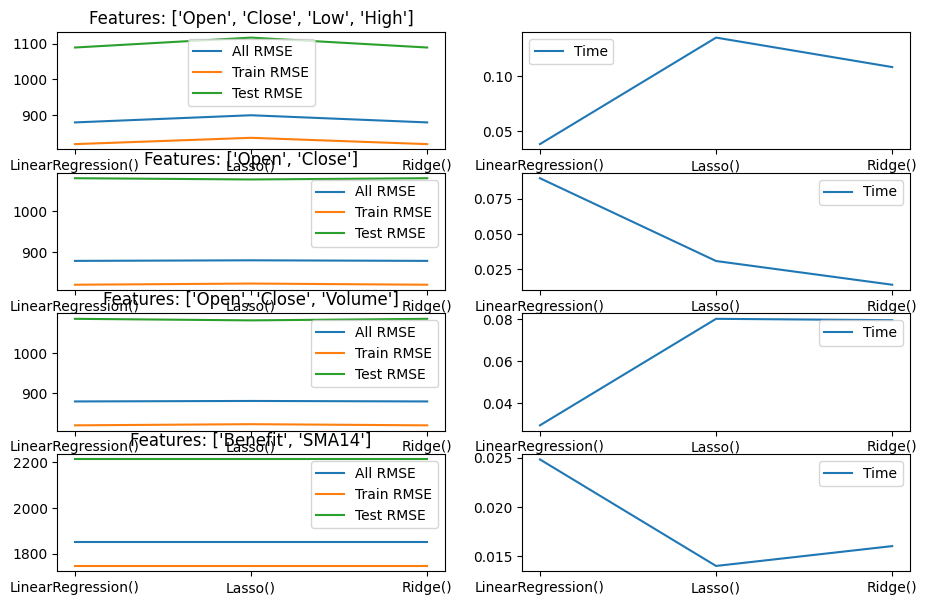

In [14]:
import time

import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

btc = yf.download("BTC-USD", start="2015-01-01", end="2024-07-30")

result_list = []

# Feature Extraction
btc["Benefit"] = btc["Close"] - btc["Open"]
btc["Tomorrow"] = btc["Close"].shift(-1)
btc["SMA14"] = btc["Close"].rolling(14).mean() #Simple Moving Average, 14-day


# PreProcessing
btc.dropna(inplace=True)


X_datasets = [btc[["Open", "Close", "Low", "High"]], btc[["Open", "Close"]], btc[["Open", "Close", "Volume"]], btc[["Benefit", "SMA14"]]]
models = [LinearRegression(), Lasso(), Ridge()]


for X in X_datasets:
    
    y = btc["Tomorrow"]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    
    for model in models:

        start = time.time()

        # Train
        model.fit(x_train, y_train)

        # Predict
        all_pred = model.predict(X)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        # Evaluate
        all_rmse = root_mean_squared_error(y, all_pred)
        train_rmse = root_mean_squared_error(y_train, y_train_pred)
        test_rmse = root_mean_squared_error(y_test, y_test_pred)

        end = time.time()


        result = {
            "features": f"{str([feature for feature in X.keys()])}",
            "model": f"{str(model)}",
            "all_rmse": all_rmse,
            "train_rmse": train_rmse,
            "test_rmse": test_rmse,
            "time": end - start
        }
        result_list.append(result)


result_df = pd.DataFrame(result_list)
result_df.to_csv('btc-features-models.csv')
print(result_df)


# Visualize
features = [["Open", "Close", "Low", "High"], ["Open", "Close"], ["Open", "Close", "Volume"], ["Benefit", "SMA14"]]

plt.figure(figsize=[11,7])

for index, feature in enumerate(features):

    feature_df = result_df.loc[result_df["features"] == str(feature)]

    plt.subplot(4, 2, (index*2+1));
    plt.title(f"Features: {feature}");
    plt.plot(feature_df["model"], feature_df["all_rmse"], label="All RMSE");
    plt.plot(feature_df["model"], feature_df["train_rmse"], label="Train RMSE");
    plt.plot(feature_df["model"], feature_df["test_rmse"], label="Test RMSE");
    plt.legend();

    plt.subplot(4, 2, (index*2)+2);
    plt.plot(feature_df["model"], feature_df["time"], label="Time");
    plt.legend();

plt.show()